# Tutorial de pytrends (Google Trends API para python)

En este cuaderno utilizaremos la API de Twitter para extraer tweets por medio de la bibliotca [pytrends](https://pypi.org/project/pytrends/).

Importemos las bibliotecas con las que vamos a trabajar:

In [27]:
from pytrends.request import TrendReq 
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Definimos el estilo de las gráficas

In [12]:
sns.set(rc={'figure.figsize':(11, 5)})
sns.set_style("white")

A continuación definimos una función `consulta` que:

Nos conecta a Google `TrendReq()`

Carga la solicitud `pytrend.build_payload()` 

Nos da el interés de la búsqueda a lo largo del tiempo `pytrend.interest_over_time()`

Nos muestra detalladamente las búsquedas relacionadas a las palabras claves `pytrend.related_queries()`

In [31]:
def consulta(kw_list, cat=0, timeframe='today 12-m', geo='VE'):
   
    """Nos conectamos a google"""
    pytrend = TrendReq(hl='es-VE') 
    
    """Hacemos la solicitud:
    kw_list = lista de palabras claves
    cat = categoría (todas las categorías (0))
    timeframe =  rango de tiempo
    geo = país (Abreviatura de dos letras del país (VE))
    """
    pytrend.build_payload(kw_list, cat, timeframe, geo) 
    
    """Interés a lo largo del tiempo"""
    iot_df = pytrend.interest_over_time()
    iot_df.reset_index().plot(x="date", y=kw_list, kind ="line")
    
    """Búsquedas de temas relacionados""" 
    rq_df = pytrend.related_queries()
    
    print(rq_df)

**Palabras claves**

oxigeno, GoFundMe, tratamiento covid-19, dexametasona.

{'oxigeno': {'top':                                         query  value
0                       saturacion de oxigeno    100
1                     concentrador de oxigeno     74
2                          bombona de oxigeno     54
3                           ciclo del oxigeno     53
4                saturacion de oxigeno normal     25
5                bombona de oxigeno medicinal     15
6                        manometro de oxigeno     13
7                                    oximetro     12
8              falta de oxigeno en el cerebro     11
9                        regulador de oxigeno      8
10                      flujometro de oxigeno      8
11                       saturador de oxigeno      6
12                        oxigeno bello monte      6
13                     saturometro de oxigeno      4
14                 nivel de oxigeno en sangre      4
15       concentrador de oxigeno de 10 litros      2
16        concentrador de oxigeno de 5 litros      2
17  valores normales de sa

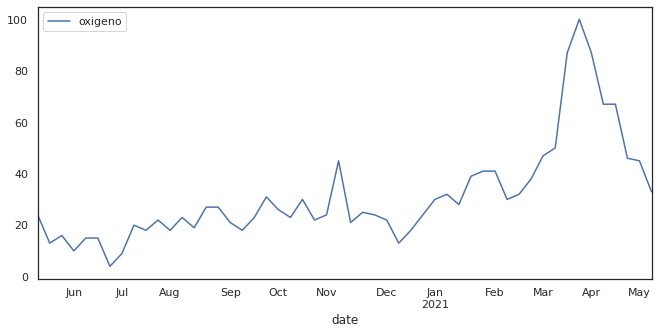

In [32]:
kw_list = ['oxigeno']
consulta(kw_list, cat=0,  timeframe='today 12-m', geo='VE')

**Análisis**

Estos resultados se pueden dividir en dos partes: primero, nos muestra información sobre las búsquedas relacionadas a la palabras clave, donde los valores se presentan a un escala del 0 al 100. El número 100 le corresponde a la tendencia más alta y a medida que va disminuyendo el número, va disminuyendo la tendencia. Finalmente, nos arroja una serie de tiempo que representa el interés a lo largo del tiempo, es decir, como estas palabras clave cambiaron en popularidad con el tiempo.

Específicamente con la palabra clave "oxigeno",  las tendencias de las consultas relacionadas a ella son "saturacion de oxigeno" (100), "concentrador de oxigeno" (74) y "bombona de oxigeno" (54). Adicionalmente, observamos como cambia el interés de "oxigeno", teniendo un incremento de búsqueda muy notable entre marzo y mediados de abril. 

{'GoFundMe': {'top':                 query  value
0  gofundme venezuela    100
1     gofundme que es     27, 'rising':                 query   value
0     gofundme que es  142550
1  gofundme venezuela     400}}


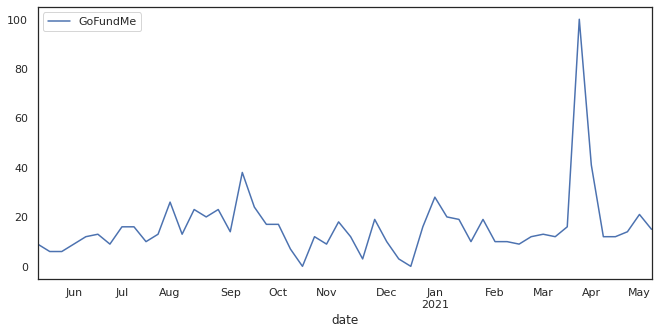

In [33]:
kw_list = ['GoFundMe']
consulta(kw_list, cat=0,  timeframe='today 12-m', geo='VE')

{'tratamiento covid-19': {'top': None, 'rising': None}}


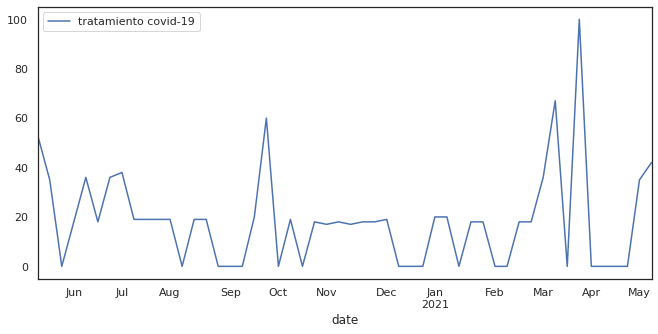

In [6]:
kw_list = ['tratamiento covid-19']
consulta(kw_list, cat=0,  timeframe='today 12-m', geo='VE')

{'dexametasona': {'top':                                      query  value
0              para que sirve dexametasona    100
1                dexametasona para q sirve     93
2           para que sirve la dexametasona     50
3                             betametasona     39
4                     dexametasona ampolla     30
5                 dexametasona para que es     30
6                  dexametasona inyectable     26
7                   que es la dexametasona     23
8                       dexametasona dosis     20
9              para que es la dexametasona     19
10          para que sirve el dexametasona     16
11  efectos secundarios de la dexametasona     12
12            para q sirve la dexametasona     12
13                              prednisona      9
14      clotrimazol neomicina dexametasona      8
15                   dexametasona tabletas      7
16  para que sirve dexametasona en ampolla      5
17            levofloxacina para que sirve      4
18               dexameta

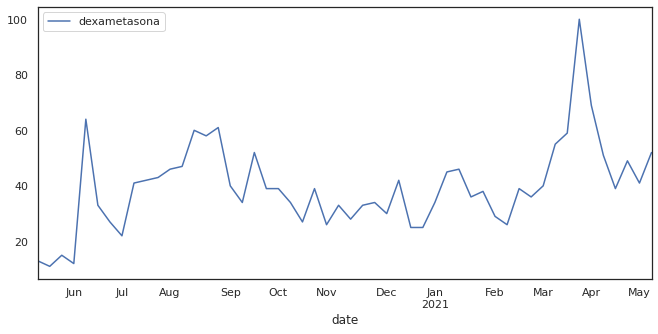

In [34]:
kw_list = ['dexametasona']
consulta(kw_list, cat=0,  timeframe='today 12-m', geo='VE')

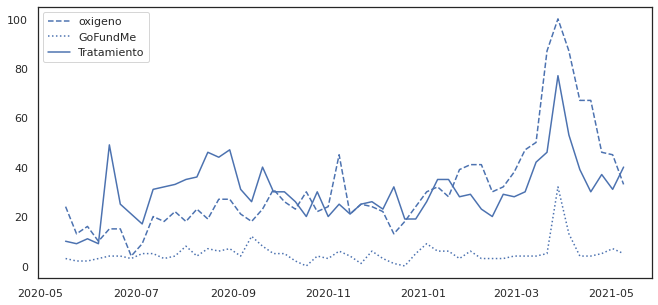

In [57]:
#pytrend = TrendReq(hl='es-VE') 
kw_list = ['oxigeno', 'GoFundMe', 'tratamiento covid', 'dexametasona']
pytrend.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='VE') 
df = pytrend.interest_over_time()

plt.figure()
plt.plot(df.index,df.oxigeno,'b--')
plt.plot(df.index,df.GoFundMe,'b:')
#plt.plot(df.index,df.tratamiento,'b:-')
plt.plot(df.index,df.dexametasona,'b-')
plt.legend(['oxigeno','GoFundMe','Tratamiento', 'dexametasona'])

<AxesSubplot:xlabel='date'>

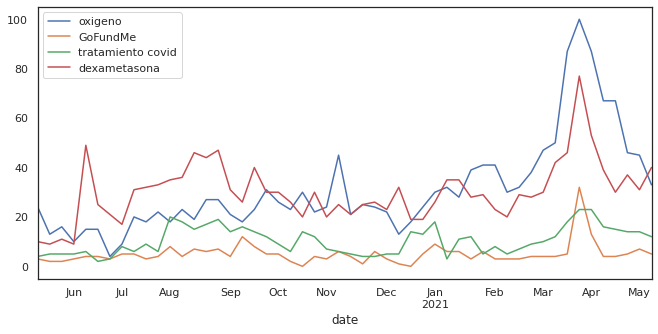

In [59]:
# esta celda es para hacer el análisis mientras resuelvo lo de la columna "tratamiento covid"
kw_list = ['oxigeno', 'GoFundMe', 'tratamiento covid', 'dexametasona']
pytrend.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='VE') 
df = pytrend.interest_over_time()
df.reset_index().plot(x="date", y=kw_list, kind ="line")